Libraries

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly
import seaborn as sns

## <u> Data Inspection </u>

Read in the data

In [4]:
df = pd.read_csv('cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [68]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [287]:
df.groupby("class").describe()

Elevation                                                            \
          count         mean         std     min      25%     50%     75%   
class                                                                       
1      211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0  3235.0   
2      283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0  3042.0   
3       35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0  2549.0   
4        2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0  2304.0   
5        9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0  2857.0   
6       17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0  2544.0   
7       20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0  3409.0   

                 Aspect              ... Soil_Type39      Soil_Type40  \
          max     count        mean  ...         75%  max       count   
class                                ...                                
1      3686.0  211840.0  156.138227  ...         0.0  1.0    211840.0   
2      3433.0  283301.0  152.060515  ...         0.0  1.0    283301.0   
3      2899.0   35754.0  176.372490  ...         0.0  0.0     35754.0   
4      2526.0    2747.0  137.139425  ...         0.0  0.0      2747.0   
5      3011.0    9493.0  139.283051  ...         0.0  0.0      9493.0   
6      2900.0   17367.0  180.539068  ...         0.0  0.0     17367.0   
7      3858.0   20510.0  153.236226  ...         1.0  1.0     20510.0   

                                                    
           mean       std  min  25%  50%  75%  max  
class                                               
1      0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2      0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6      0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7      0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

When we use a standard scaler, or normalizer, we want to skip over the binary columns.

In [266]:
# Numerical values, e.g. distance
numeric_columns = df.columns[:10]
nc_list = numeric_columns.to_list()

# Columns that are 1 or 0, indicator variables
categorical_columns = df.columns[10:-1]

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'class']


Here the distribution of each numerical variable across each class is investigated, as well as inter-variable correlations.

/Users/jacobjwood/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:396: UserWarning:

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes

/Users/jacobjwood/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


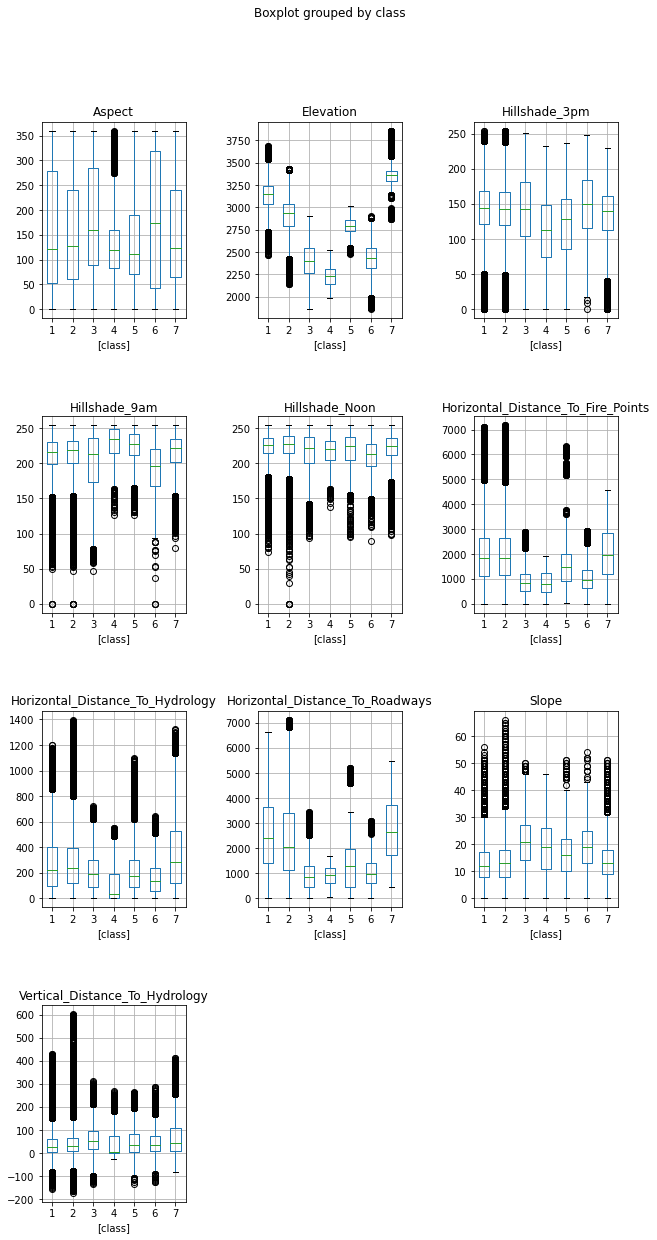

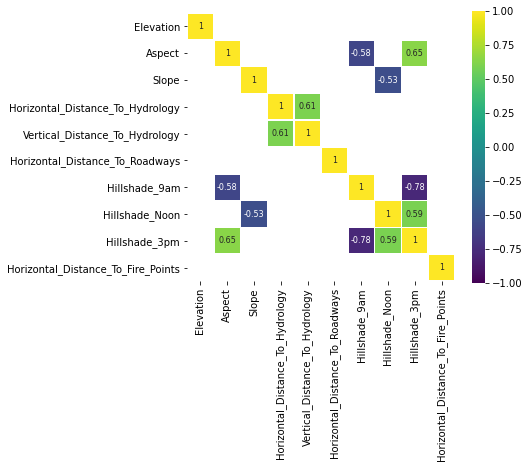

In [333]:
def plot_distributions(numeric_variable="Elevation"):
    df_num_and_labels = df[nc_list + ["class"]]
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 20))
    fig.tight_layout()
    df_num_and_labels.boxplot(ax=axs.reshape(-1)[:-2], by="class")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.delaxes(axs[3, 1])
    fig.delaxes(axs[3, 2])
    fig.show()
    
def plot_correlations():
    df_num = df[nc_list]
    corr = df_num.corr()
    plt.figure(figsize=(6, 5))

    sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.5,
            annot=True, annot_kws={"size": 8}, square=True)
    return corr

plot_distributions()
plot_correlations()

We can see that the vertical distance to hydrology has little difference between groups. There are some variables that are correlated with one another, particularly hillside shade. As the sun moves around hills, it follows that (with the exception of trees surrounded by steep hill), that if there is shade in the morning it is likely to have no shade in the afternoon. There appears to be little difference between groups for noon hillside-shade when there is very little shelter from the sun. We can also see that hillside shade is correlated with slope and aspect.

Given that all features are present for every entry, we do not need to worry about missing data and its subsequent treatment. To improve performance later, we may consider feature engineering.

## <u>Data Preprocessing</u>

Here the data is separated from the labels and the class distribution is inspected. We can see that there is a class imbalance between the classes, so the stratify argument is used when calling train_test_split.

In [125]:
data = df.iloc[:, :-1]
labels = df["class"]
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

### Data Preprocessing Functions

In [338]:
def get_processed_data(data):
    processed_data = data[data.columns]
    return processed_data

def data_split(data, labels, random_state=32):
    '''
    Returns data of train, val, test sets then their respective labels.
    '''
    # Offset the labels by 1, because for some reason they start from 1
    labels = np.array(labels - 1)
    print(np.unique(labels))
    labels = tf.keras.utils.to_categorical(labels, num_classes=7)
    # First set splits train and test data
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=random_state)
    # Further split train data to now include a validation set
    train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, stratify=train_labels, random_state=random_state)
    # Check shape
    print(train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape)
    # Return the values
    return train_data, val_data, test_data, train_labels, val_labels, test_labels
    
def column_transform(train_data, columns_to_transform, val_data=None, test_data=None):
    # Currently using a StandardScaler(), could also try a normalizer()
    ct = ColumnTransformer([("StandardScaler1", StandardScaler(), columns_to_transform)], remainder='passthrough')
    train_data = ct.fit_transform(train_data)
    if val_data is not None:
        val_data = ct.fit_transform(val_data)
    if test_data is not None:
        test_data = ct.fit_transform(test_data)
    return train_data, val_data, test_data



## <u>Building the Model</u>

### Model architecture functions

In [353]:
def build_model(train_data, val_data, train_labels, val_labels, lr=0.001):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=train_data.shape[1]))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dropout(rate=.1))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['acc', tf.keras.metrics.AUC(multi_label=True, name="auc", num_labels=7)])
    
    history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=es, batch_size=32, epochs=50)
                  
    return model, history

### Evaluation Functions

In [362]:
def plot_metrics(history):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.plot(history.history['val_acc'], label="Validation")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Accuracy")
    ax1.plot(history.history['acc'], label="Training")
    ax1.set_title("Accuracy through training")
    ax1.legend()

    ax2.plot(history.history['val_loss'], label="Validation")
    ax2.plot(history.history['loss'], label="Training")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.set_title("Loss over training")
    ax2.legend()
    
    ax3.plot(history.history['val_auc'], label="Validation")
    ax3.plot(history.history['auc'], label="Training")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("AUC")
    ax3.set_title("AUC over training")
    ax3.legend()

    fig.show()
    
def print_diagnostics(data, labels):
    y_true, y_pred = restore_labels(labels), restore_labels(model.predict(data))

    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return confusion_matrix(y_true, y_pred)
    
def restore_labels(labels):
    labels = [np.argmax(i) for i in labels]
    return labels


## <u> Training the model </u>

In [355]:
processed_data = get_processed_data(data)
train_data, val_data, test_data, train_labels, val_labels, test_labels = data_split(processed_data, labels)
train_data, val_data, test_data = column_transform(train_data=train_data, 
                                                   columns_to_transform=numeric_columns, 
                                                   val_data=val_data,
                                                   test_data=test_data)
train_data = pd.DataFrame(train_data, columns = data.columns)
model, history = build_model(train_data, val_data, train_labels, val_labels)

[0 1 2 3 4 5 6]
(348606, 54) (348606, 7) (116203, 54) (116203, 7) (116203, 54) (116203, 7)
Epoch 1/50
10894/10894 [==============================] - 14s 1ms/step - loss: 0.5780 - acc: 0.7523 - auc: 0.9461 - val_loss: 0.4940 - val_acc: 0.7868 - val_auc: 0.9627
Epoch 2/50
10894/10894 [==============================] - 12s 1ms/step - loss: 0.4896 - acc: 0.7888 - auc: 0.9622 - val_loss: 0.4483 - val_acc: 0.8094 - val_auc: 0.9690
Epoch 3/50
10894/10894 [==============================] - 12s 1ms/step - loss: 0.4574 - acc: 0.8051 - auc: 0.9670 - val_loss: 0.4241 - val_acc: 0.8215 - val_auc: 0.9724
Epoch 4/50
10894/10894 [==============================] - 13s 1ms/step - loss: 0.4384 - acc: 0.8133 - auc: 0.9695 - val_loss: 0.4021 - val_acc: 0.8298 - val_auc: 0.9748
Epoch 5/50
10894/10894 [==============================] - 14s 1ms/step - loss: 0.4254 - acc: 0.8201 - auc: 0.9713 - val_loss: 0.3878 - val_acc: 0.8382 - val_auc: 0.9776
Epoch 6/50
10894/10894 [==============================] - 13s 1m

Epoch 49/50
10894/10894 [==============================] - 13s 1ms/step - loss: 0.3428 - acc: 0.8586 - auc: 0.9796 - val_loss: 0.2981 - val_acc: 0.8787 - val_auc: 0.9860


/Users/jacobjwood/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



              precision    recall  f1-score   support

           0       0.89      0.86      0.87     42368
           1       0.88      0.92      0.90     56660
           2       0.90      0.83      0.86      7151
           3       0.88      0.66      0.76       549
           4       0.76      0.57      0.65      1899
           5       0.71      0.83      0.76      3474
           6       0.91      0.86      0.88      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.79      0.81    116203
weighted avg       0.88      0.88      0.88    116203

[[36292  5704     0     0    50    11   311]
 [ 3926 52046   145     0   273   226    44]
 [    1   299  5914    44    17   876     0]
 [    0     0   116   365     0    68     0]
 [   42   689    71     0  1085    12     0]
 [   12   271   300     7     0  2884     0]
 [  523    52     0     0     2     0  3525]]


array([[36292,  5704,     0,     0,    50,    11,   311],
       [ 3926, 52046,   145,     0,   273,   226,    44],
       [    1,   299,  5914,    44,    17,   876,     0],
       [    0,     0,   116,   365,     0,    68,     0],
       [   42,   689,    71,     0,  1085,    12,     0],
       [   12,   271,   300,     7,     0,  2884,     0],
       [  523,    52,     0,     0,     2,     0,  3525]])

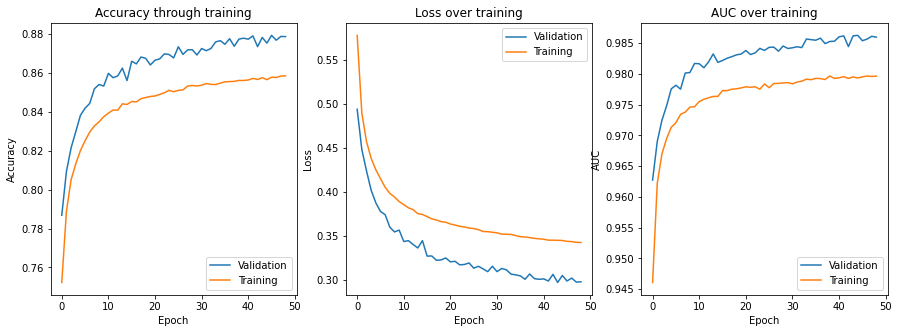

In [363]:
plot_metrics(history)
print_diagnostics(val_data, val_labels)

We can see that performance on the validation set looks better than on the training set, but this is due to the use of a dropout layer in training.

Several hyperparameters were explored, but the addition of extra layers/changing the number of neurons had little improvement on overall accuracy. Inspecting the confusion matrix for the validation set, most sets were predicted with a high degree of accuracy (>75%), save for class 4 which was incorrectly classified as class 2 a lot of the time. 

This could be improved by providing weights when training so that less prominent classes carry the same relative penalty when misclassified as the prominent classes do. Further architectures could also be explored, but due to the computational limitations of this macbook I will stop here.

## <u>Saving the Model</u>

In [357]:
model.save('./best_model.h5')

## <u>Testing the Model</u>

Now the model will be evaluated on the test data.

In [358]:
final_model = tf.keras.models.load_model('./best_model.h5')
final_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 455       
Total params: 8,135
Trainable params: 8,135
Non-trainable params: 0
_________________________________________________________________


In [359]:
final_model.evaluate(test_data, test_labels)

3632/3632 [==============================] - 3s 852us/step - loss: 0.2971 - acc: 0.8797 - auc: 0.9854


[0.29707446694374084, 0.8796846866607666, 0.985442042350769]

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     42368
           1       0.88      0.92      0.90     56661
           2       0.90      0.83      0.87      7151
           3       0.89      0.71      0.79       549
           4       0.77      0.59      0.66      1899
           5       0.72      0.83      0.77      3473
           6       0.91      0.88      0.89      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.80      0.82    116203
weighted avg       0.88      0.88      0.88    116203

[[36194  5791     3     0    53     9   318]
 [ 3875 52077   162     0   276   223    48]
 [    0   323  5955    39     7   827     0]
 [    0     0   102   389     0    58     0]
 [   34   685    53     0  1111    16     0]
 [    9   231   328    11     1  2893     0]
 [  442    57     0     0     0     0  3603]]


<AxesSubplot:>

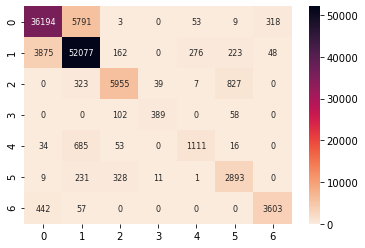

In [378]:
cm = print_diagnostics(test_data, test_labels)
sns.heatmap(cm, cmap="rocket_r", fmt='g', annot=True, annot_kws={"size": 8})

We see a similar performance on the test set as with the validation set. The heatmap does not account for the class imbalance.

We could try other models such as an SVM or Gradient Boosted Trees to compare and using the latter we could also plot feature importance. A random assignment would have an accuracy of 14%, so this model definitely beats that with an accuracy of 88%. Feature pruning was not explored, but could also be considered.